In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv("water-treatment_data.csv", names=['N_attribut','Q-E','ZN-E','PH-E','DBO-E','DQO-E','SS-E',
                                                        'SSV-E','SED-E','COND-E','PH-P','DBO-P','SS-P','SSV-P',
                                                       'SED-P','COND-P','PH-D','DBO-D','DQO-D','SS-D','SSV-D',
                                                       'SED-D','COND-D','PH-S','DBO-S','DQO-S','SS-S','SSV-S',
                                                       'SED-S','COND-S','RD-DBO-P','RD-SS-P','RD-SED-P',
                                                       'RD-DBO-S','RD-DQO-S','RD-DBO-G','RD-DQO-G','RD-SS-G',
                                                      'RD-SED-G'])

In [7]:
data.shape

(527, 39)

In [8]:
data.head()

,N_attribut,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [9]:
data.dtypes

N_attribut     object
Q-E            object
ZN-E           object
PH-E          float64
DBO-E          object
DQO-E          object
SS-E           object
SSV-E          object
SED-E          object
COND-E          int64
PH-P          float64
DBO-P          object
SS-P            int64
SSV-P          object
SED-P          object
COND-P          int64
PH-D          float64
DBO-D          object
DQO-D          object
SS-D           object
SSV-D          object
SED-D          object
COND-D          int64
PH-S           object
DBO-S          object
DQO-S          object
SS-S           object
SSV-S          object
SED-S          object
COND-S         object
RD-DBO-P       object
RD-SS-P        object
RD-SED-P       object
RD-DBO-S       object
RD-DQO-S       object
RD-DBO-G       object
RD-DQO-G       object
RD-SS-G        object
RD-SED-G       object
dtype: object

In [10]:
data.replace('?',np.nan,inplace=True)

In [11]:
data = data.drop(columns=['N_attribut','RD-DBO-P','RD-DBO-S','DBO-P'])

In [12]:
data.isna().sum().sort_values(ascending=False)

RD-DBO-G    36
RD-SED-G    31
SED-S       28
DBO-D       28
RD-SED-P    27
RD-DQO-S    26
RD-DQO-G    25
SED-E       25
SED-D       25
SED-P       24
DBO-S       23
DBO-E       23
Q-E         18
DQO-S       18
SSV-S       17
SSV-D       13
SSV-P       11
SSV-E       11
DQO-D        9
RD-SS-G      8
DQO-E        6
SS-S         5
RD-SS-P      4
ZN-E         3
SS-D         2
COND-S       1
SS-E         1
PH-S         1
COND-E       0
PH-P         0
COND-D       0
COND-P       0
PH-E         0
PH-D         0
SS-P         0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
for cols in data.columns.values[data.dtypes == object]:
    data[cols] = pd.to_numeric(data[cols], errors='ignore')

In [15]:
data.dtypes

Q-E           int64
ZN-E        float64
PH-E        float64
DBO-E         int64
DQO-E         int64
SS-E          int64
SSV-E       float64
SED-E       float64
COND-E        int64
PH-P        float64
SS-P          int64
SSV-P       float64
SED-P       float64
COND-P        int64
PH-D        float64
DBO-D         int64
DQO-D         int64
SS-D          int64
SSV-D       float64
SED-D       float64
COND-D        int64
PH-S        float64
DBO-S         int64
DQO-S         int64
SS-S          int64
SSV-S       float64
SED-S       float64
COND-S        int64
RD-SS-P     float64
RD-SED-P    float64
RD-DQO-S    float64
RD-DBO-G    float64
RD-DQO-G    float64
RD-SS-G     float64
RD-SED-G    float64
dtype: object

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

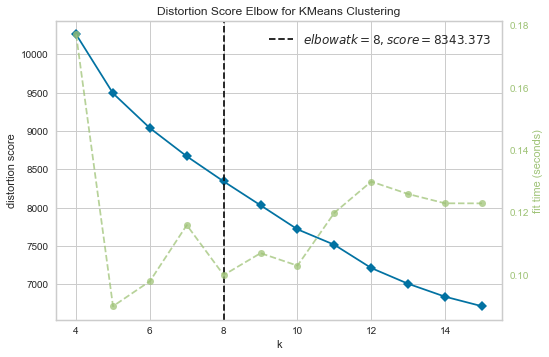

In [17]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,16))
visualizer.fit(data)
visualizer.poof()

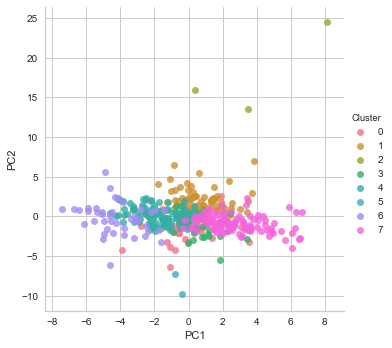

In [18]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(data)
pca_x = pca.transform(data)
pca_df = pd.DataFrame([pca_x[:, 0], pca_x[:, 1]]).T
pca_df.columns = ['PC1', 'PC2']

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(data)
data['Cluster'] = kmeans.labels_

pca_df = pd.concat([pca_df, data['Cluster']], axis=1)
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster', fit_reg=False)

In [19]:
data.drop(columns=['Cluster'], inplace=True)

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(data, kmeans.predict(data))

0.10073801369704741

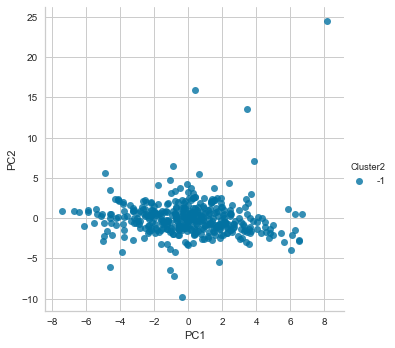

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5)
dbscan.fit(data)
data['Cluster2'] = dbscan.labels_
pca_df = pd.concat([pca_df, data['Cluster2']], axis=1)
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster2', fit_reg=False)